# Calculating the amplitude $\Delta I/I_{p}$ of a resistive pulse event
### Intro
- Calculating the amplitude of an RP event requires knowing the events baseline, and finding the point within the signal for which we wish to know the amplitude

# 0. Imports

In [15]:
# Python standard library
import sys

# Scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.ndimage

# pore_stats
sys.path.append('/home/prestonh/Desktop/Research/pore_stats/lib/rp')
import resistive_pulse as rp
import rp_file

# 1. Load data

In [25]:
rp_samp_rate = 250000.

In [10]:
# File name parameters
date = '4-5-2017'
particle = '10um_ps'
channel = '20-50-20_0'
file_index = '0'

# Data
rp_data_file_directory = '/home/prestonh/Desktop/Research/cancer_cells/data/'\
                    +date+'/'+particle+'/'+channel+'/rp/bts/'
rp_data_file_name = 'test_rp_' + file_index
rp_data_file_path = rp_data_file_directory + rp_data_file_name + '.bts'

rp_data = rp_file.get_data(rp_data_file_path)


# Events
rp_events_file_directory = '/home/prestonh/Desktop/Research/cancer_cells/data/'\
                    +date+'/'+particle+'/'+channel+'/rp/events/'
rp_events_file_name = 'test_rp_' + file_index + '_events_sync.json'
rp_events_file_path = rp_events_file_directory + rp_events_file_name

rp_events = rp_file.open_event_file_json(rp_events_file_path)

##### Select a single event and plot it to see what it looks like

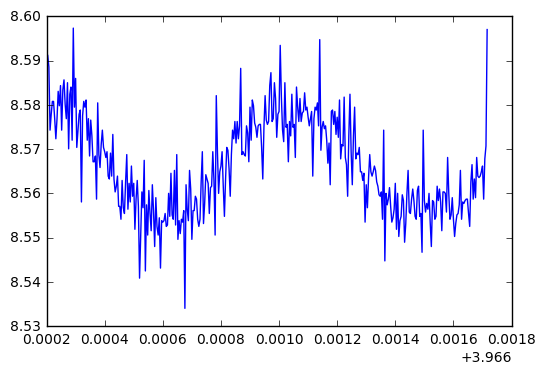

In [14]:
rp_event = rp_events[20]

plt.plot(rp_event._data[:,0], rp_event._data[:,1])

plt.show()

### Get $\Delta I/I_{p}$

In [78]:
def get_dI_Ip_min(rp_data, rp_event, num_pts_avg = 10, debug = False):
    I0 = get_I0(rp_data, rp_event, debug = debug)
    Ip_min = get_Ip_min(rp_data, rp_event, num_pts_avg = num_pts_avg, debug = debug)
    
    
    
    return np.abs((Ip_min-I0)/Ip_min)

def get_I0(rp_data, rp_event, debug = False):
    i0 = rp_event._data[0,0]*rp_samp_rate
    i1 = rp_event._data[-1,0]*rp_samp_rate
    I0 = rp_event._baseline[1]
    
    if debug:
        plt.plot(rp_data[i0:i1,0], rp_data[i0:i1,1], lw = 3, ls = '--')
        plt.plot(rp_event._data[:,0], rp_event._data[:,1])
        plt.plot([rp_data[i0,0], rp_data[i1,0]], [I0, I0], ls = '--', lw = 3, c = 'k')
        plt.xlim(rp_data[i0,0], rp_data[i1,0])
        plt.show()
        
    
    return rp_event._baseline[1]

def get_Ip_min(rp_data, rp_event, num_pts_avg = 10, debug = False):
    
    i0 = rp_event._data[0,0]*rp_samp_rate
    i1 = rp_event._data[-1,0]*rp_samp_rate
    
    i_maxima, i_minima = rp.get_maxima_minima(rp_data[i0:i1,1], num_minima = 1, return_by = 'low')
    i_minimum = i_minima[0]
    
    
    i_range = range(i_minimum-num_pts_avg/2, i_minimum+num_pts_avg/2+1)
    
    Ip = np.mean(rp_event._data[i_range,1])
    
    
    if debug:
        plt.plot(rp_data[i0:i1,0], rp_data[i0:i1,1], lw = 3, ls = '--')
        plt.plot(rp_event._data[:,0], rp_event._data[:,1])
        plt.scatter(rp_data[i0+i_minimum,0], rp_data[i0+i_minimum,1], marker = 'x', c = 'red', s = 200)
        plt.plot([rp_data[i0,0], rp_data[i1,0]], [Ip, Ip], ls = '--', lw = 3, c = 'k')
        plt.xlim(rp_data[i0,0], rp_data[i1,0])
        plt.show()
        
    return Ip
        
    



/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


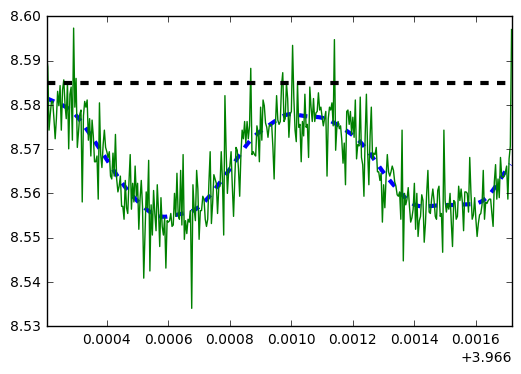

/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:29: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:42: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/prestonh/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error

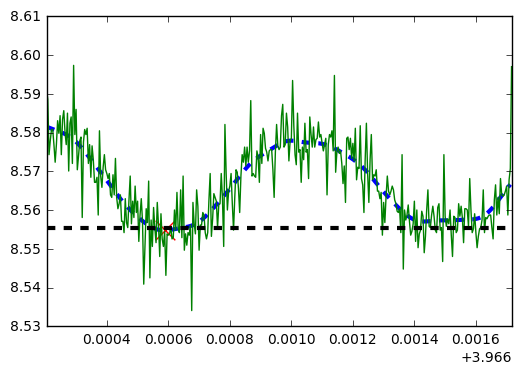

0.00347083479826


In [80]:
rp_filtered_data = np.hstack((rp_data[:,0].reshape(-1,1),\
                              scipy.ndimage.filters.gaussian_filter(rp_data[:,1], sigma = 10).reshape(-1,1)))

#plt.plot(rp_filtered_data[:1000,0], rp_filtered_data[:1000,1])
print get_dI_Ip_min(rp_filtered_data, rp_event, num_pts_avg = 50, debug = True)